In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import os
from gamap_colormap import WhGrYlRd  # import the "WhGrYlRd" variable from my custom Python script
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import ScalarFormatter,AutoMinorLocator 
plt.style.use(
    "https://github.com/aeturrell/coding-for-economists/raw/main/plot_style.txt"
)
mpl.rcParams.update({"lines.linewidth": 1.2})
# Set max rows displayed for readability
pd.set_option("display.max_rows", 8)
import warnings
warnings.filterwarnings("ignore")



In [2]:
# os.chdir('/home/tzd/fs03/d1/tzd/Data_analysis/MIT_TPP_thesis/JPnotebooks/GMA2018')

In [3]:
GlobalHgInventry={
'Fuel combustion':533,
'Industry Sectors':614,
'Intentional Use(including product waste)':239,
'Artisanal and Small Scale Gold Mining':838,
'Total':2220,
'Total Lower':2000,
'Total Upper':2820}

In [4]:
ASGM_perRegion={
'Australia, New Zealand & Oceania':0.0,
'Central America and the Caribbean':14.3,
'CIS & other European countries':12.7,
'East and Southeast Asia':214,
'EU28':0.0,
'Middle Eastern States':0.225,
'North Africa':0.0,
'North America':0.0,
'South America':340,
'South Asia':4.50,
'Sub-Saharan Africa':252
}
df_asgmPregion=pd.DataFrame([ASGM_perRegion])
df_asgmPregion=df_asgmPregion.T
df_asgmPregion=df_asgmPregion.sort_values(by=[0])
df_asgmPregion=df_asgmPregion.reset_index()
df_asgmPregion=df_asgmPregion.rename(columns={'index':'World Regions',0:"ASGM Emission(t)"})

In [5]:
df_asgmPregion

,World Regions,ASGM Emission(t)
0,"Australia, New Zealand & Oceania",0.0
1,EU28,0.0
2,North Africa,0.0
3,North America,0.0
...,...,...
7,Central America and the Caribbean,14.3
8,East and Southeast Asia,214.0
9,Sub-Saharan Africa,252.0
10,South America,340.0


In [6]:
(214+252+340)/df_asgmPregion['ASGM Emission(t)'].sum()

0.9621295771285326

[Text(0, 0, 'Australia, New Zealand & Oceania'),
 Text(1, 0, 'EU28'),
 Text(2, 0, 'North Africa'),
 Text(3, 0, 'North America'),
 Text(4, 0, 'Middle Eastern States'),
 Text(5, 0, 'South Asia'),
 Text(6, 0, 'CIS & other European countries'),
 Text(7, 0, 'Central America and the Caribbean'),
 Text(8, 0, 'East and Southeast Asia'),
 Text(9, 0, 'Sub-Saharan Africa'),
 Text(10, 0, 'South America')]

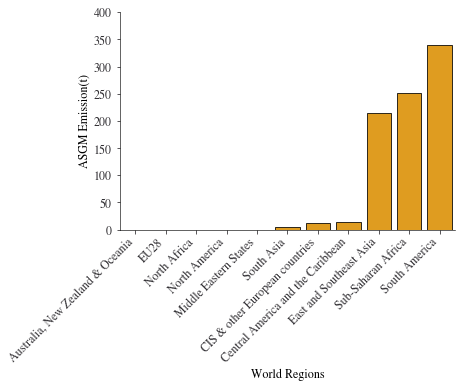

In [7]:


# Make a barplot
chart=sns.barplot(
    x="World Regions", 
    y="ASGM Emission(t)", 
    data=df_asgmPregion, 
    color='#FFA500'
);
# Rotate tick labels
chart.set_xticklabels(chart.get_xticklabels(), rotation=45,horizontalalignment='right')


In [8]:
((8*1393.23)+(2*1432.90))

14011.64

In [9]:
# ASGM Artisanal and small-scale gold mining 679 838
# BIO Biomass burning (domestic, industrial and power plant) 49.5 51.9
# CEM Cement production (raw materials and fuel, excluding coal)a 187 233
# CREM Cremation emissions 4.91 3.77
# CSP Chlor-alkali production (mercury process) 21.0 15.2
# NFMP Non-ferrous metal production (primary Al, Cu, Pb, Zn)a 151 228
# NFMP-AU Large-scale gold production) 73.1 84.5
# NFMP-HG Mercury production) 12.2 13.8
# OR Oil refining 13.1 14.4
# PISP Pig iron and steel production (primary)a 26.7 29.8
# SC-DR-coal Stationary combustion of coal (domestic/residential, transportation) 54.4 55.8
# SC-DR-gas Stationary combustion of gas (domestic/residential, transportation) 0.162 0.165
# SC-DR-oil Stationary combustion of oil (domestic/residential, transportation) 2.63 2.70
# SC-IND-coal Stationary combustion of coal (industrial) 123 126
# SC-IND-gas Stationary combustion of gas (industrial) 0.115 0.123
# SC-IND-oil Stationary combustion of oil (industrial) 3.05 1.40
# SC-PP-coal Stationary combustion of coal (power plants) 268 292
# SC-PP-gas Stationary combustion of gas (power plants) 0.319 0.349
# SC-PP-oil Stationary combustion of oil (power plants) 2.58 2.44
# SSC Secondary steel production 9.69 10.1
# VCM Vinyl-chloride monomer (mercury catalyst) b 58.3
# WASOTH Waste (other waste)c 115 147
# WI Waste incineration (controlled burning)c 15.4 15.0
# Total 1810 2220
# a

In [10]:
ASGM_emissions=pd.read_csv('hgASGM.csv')
ASGM_emissions

,Country,Quality of dataa,"± error, %",min,mean,max,"Percentage of total Hg\napplied in concentrate\namalgamation, %CA","Percentage of total Hg applied in whole ore amalgamation, %WOA","Emission Factor, EF EFCA=75% (1/1.3) EFWOA= 20% (1/5)",Year of most\nrecent data,"Mean air emission, t","Release to\nwater and\nland, t"
0,Bolivia,4,30,84.0,120.0,156.0,25.0,75.0,0.34,2012.0,40.5,79.5
1,Guinea,4,30,13.4,19.1,24.8,100.0,0.0,0.75,2017.0,14.3,4.8
2,Nicaragua,4,30,2.5,3.5,4.6,0.0,100.0,0.20,1999.0,0.7,2.8
3,Peru,4,50,163.5,327.0,490.5,25.0,75.0,0.34,2017.0,110.4,216.6
...,...,...,...,...,...,...,...,...,...,...,...,...
77,Ukraine,1,100,0.1,0.3,0.5,100.0,0.0,0.75,NaN,0.2,0.1
78,Uzbekistan,1,100,0.1,0.3,0.5,100.0,0.0,0.75,2001.0,0.2,0.1
79,Zambia,1,100,0.1,0.3,0.5,100.0,0.0,0.75,2008.0,0.2,0.1
80,Zambia,1,100,0.1,0.3,0.5,100.0,0.0,0.75,2008.0,0.2,0.1


In [11]:
air_emissions=pd.DataFrame(ASGM_emissions['Country'])
print(air_emissions)

       Country
0      Bolivia
1       Guinea
2    Nicaragua
3         Peru
..         ...
77     Ukraine
78  Uzbekistan
79      Zambia
80      Zambia

[81 rows x 1 columns]


In [12]:
for country in air_emissions['Country']:
    print(country)

Bolivia
Guinea
Nicaragua
Peru
Senegal
Suriname
Brazil
Burkina Faso
Cambodia
Colombia
Ecuador
French Guiana
Ghana
Guyana
Honduras
India
Indonesia
Lao Peoples Democratic Republic
Mali
Mongolia
Mozambique
Nigeria
Philippines
Sierra Leone
Venezuela
Zimbabwe
Botswana
Cameroon
Central African Republic
Chile
China
Congo
Democratic Republic of Congo
Guatemala
Kenya
Kyrgyzstan
Madagascar
Malaysia
Mexico
Myanmar
Panama
Papua New Guinea
Russia
South Africa
South Sudan
Sudan
Tajikistan
Tanzania
Thailand
Togo
Uganda
Vietnam
Angola
Azerbaijan
Benin
Burundi
Chad
Costa Rica
Cote d'Ivoire
Dominican Rep.
El Salvador
Equitorial Guinea
Eritrea
Ethiopia
Gabon
Gambia
Guinea-Bissau
Iran
Kazakhstan
Lesotho
Liberia
Malawi
Mauritania
Niger
Paraguay
Rwanda
Swaziland
Ukraine
Uzbekistan
Zambia
Zambia


In [13]:
air_emissions['Emissions, t']=ASGM_emissions['Mean air emission, t']

In [14]:
air_emissions.drop(index=45,inplace=True)

In [15]:
air_emissions

,Country,"Emissions, t"
0,Bolivia,40.5
1,Guinea,14.3
2,Nicaragua,0.7
3,Peru,110.4
...,...,...
77,Ukraine,0.2
78,Uzbekistan,0.2
79,Zambia,0.2
80,Zambia,0.2


In [16]:
# fig = px.treemap(air_emissions, path=[px.Constant('Average Air Emissions from ASGM Activities'),'Country'], 
#                 values='Emissions, t',
#                 color='Emissions, t',
#                 color_continuous_scale='reds')
# fig.show()

ZeroDivisionError: Weights sum to zero, can't be normalized

In [17]:
air_emissions.drop(0, axis=0).sort_values(by='Emissions, t', ascending=False)

,Country,"Emissions, t"
16,Indonesia,124.5
3,Peru,110.4
9,Colombia,51.0
6,Brazil,49.9
...,...,...
53,Azerbaijan,0.2
52,Angola,0.2
57,Costa Rica,0.1
44,South Sudan,0.0


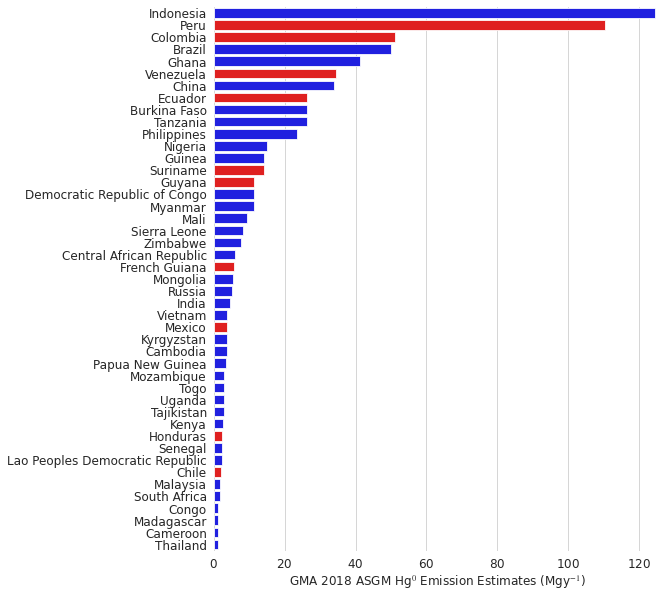

In [18]:


# Initialize the matplotlib figure
sns.set_style("whitegrid")
fig,ax = plt.subplots(figsize=(8, 10))
plot_data = air_emissions.drop(0, axis=0).sort_values(by='Emissions, t', ascending=False)
plot_data=plot_data[plot_data['Emissions, t']>1]

latam_emitters=['Peru','Colombia','Brazil ','Bolivia','Suriname','Ecuador','French Guiana','Venezuela','Guyana','Chile','Honduras','Mexico']
# Load the example car crash dataset
# crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)
colors = ["blue" if i not in latam_emitters else "red" for i in plot_data.Country]
# Plot the total crashes
sns.set_color_codes("muted")

sns.barplot(x="Emissions, t", y="Country", data=plot_data ,
            label="Emissions", palette=colors)


ax.set(xlim=(0, 126), ylabel="",
       xlabel="GMA 2018 ASGM Hg$^0$ Emission Estimates (Mgy$^{-1}$)")
sns.despine(left=True, bottom=True)
# name='07-14-22_gma2018_top-asgm-emmiting-countries.pdf'
# savepath='/home/tzd/fs03/d1/tzd/Data_analysis/MIT_TPP_thesis/figures/'+name
# fig.savefig(savepath,bbox_inches='tight')

In [19]:
air_emissions

,Country,"Emissions, t"
0,Bolivia,40.5
1,Guinea,14.3
2,Nicaragua,0.7
3,Peru,110.4
...,...,...
77,Ukraine,0.2
78,Uzbekistan,0.2
79,Zambia,0.2
80,Zambia,0.2


In [20]:
import plotly.express as px

df = px.data.gapminder().query("year==2007")
fig = px.choropleth(plot_data, 
                    color="Emissions, t", # lifeExp is a column of gapminder
                    hover_name="Country")# column to add to hover information)
fig.show()

In [21]:
df=pd.DataFrame(df)

In [27]:
emitters=list(ASGM_emissions['Country'].values)
len(emitters)

81

In [30]:
df_emitters=df[df['country'].isin(emitters)]
print(len(df_emitters))

63


In [32]:
df_emitters

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
47,Angola,Africa,2007,42.731,12420476,4797.231267,AGO,24
131,Benin,Africa,2007,56.728,8078314,1441.284873,BEN,204
143,Bolivia,Americas,2007,65.554,9119152,3822.137084,BOL,68
167,Botswana,Africa,2007,50.728,1639131,12569.851770,BWA,72
...,...,...,...,...,...,...,...,...
1643,Venezuela,Americas,2007,73.747,26084662,11415.805690,VEN,862
1655,Vietnam,Asia,2007,74.249,85262356,2441.576404,VNM,704
1691,Zambia,Africa,2007,42.384,11746035,1271.211593,ZMB,894
1703,Zimbabwe,Africa,2007,43.487,12311143,469.709298,ZWE,716


In [39]:
gapminder = px.data.gapminder() 
gapminder['country'].unique()


array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Australia', 'Austria', 'Bahrain', 'Bangladesh', 'Belgium',
       'Benin', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Czech Republic',
       'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Ethiopia',
       'Finland', 'France', 'Gabon', 'Gambia', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Haiti',
       'Honduras', 'Hong Kong, China', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kenya', 'Korea, Dem. Rep.',
       'Korea, Rep.', 'Kuwait', 'Leba

In [34]:
for item in emitters:
    if item in list(df_emitters['country'].values):
        pass
    else:
        print(item)

Suriname
French Guiana
Guyana
Lao Peoples Democratic Republic
Congo
Democratic Republic of Congo
Kyrgyzstan
Papua New Guinea
Russia
South Sudan
Tajikistan
Azerbaijan
Dominican Rep.
Equitorial Guinea
Kazakhstan
Ukraine
Uzbekistan


In [36]:
for item in df.country:
    print(item)

Afghanistan
Albania
Algeria
Angola
Argentina
Australia
Austria
Bahrain
Bangladesh
Belgium
Benin
Bolivia
Bosnia and Herzegovina
Botswana
Brazil
Bulgaria
Burkina Faso
Burundi
Cambodia
Cameroon
Canada
Central African Republic
Chad
Chile
China
Colombia
Comoros
Congo, Dem. Rep.
Congo, Rep.
Costa Rica
Cote d'Ivoire
Croatia
Cuba
Czech Republic
Denmark
Djibouti
Dominican Republic
Ecuador
Egypt
El Salvador
Equatorial Guinea
Eritrea
Ethiopia
Finland
France
Gabon
Gambia
Germany
Ghana
Greece
Guatemala
Guinea
Guinea-Bissau
Haiti
Honduras
Hong Kong, China
Hungary
Iceland
India
Indonesia
Iran
Iraq
Ireland
Israel
Italy
Jamaica
Japan
Jordan
Kenya
Korea, Dem. Rep.
Korea, Rep.
Kuwait
Lebanon
Lesotho
Liberia
Libya
Madagascar
Malawi
Malaysia
Mali
Mauritania
Mauritius
Mexico
Mongolia
Montenegro
Morocco
Mozambique
Myanmar
Namibia
Nepal
Netherlands
New Zealand
Nicaragua
Niger
Nigeria
Norway
Oman
Pakistan
Panama
Paraguay
Peru
Philippines
Poland
Portugal
Puerto Rico
Reunion
Romania
Rwanda
Sao Tome and Principe


In [ ]:
df_emission_sectors=pd.DataFrame([GlobalHgInventry]).T.reset_index()
df_emission_sectors=df_emission_sectors.rename(columns={"index": "Emission Sectors", 0: "Emissions Amount,t"})
df_emission_sectors


,Emission Sectors,"Emissions Amount,t"
0,Fuel combustion,533
1,Industry Sectors,614
2,Intentional Use(including product waste),239
3,Artisanal and Small Scale Gold Mining,838
4,Total,2220
5,Total Lower,2000
6,Total Upper,2820


In [ ]:
fig = px.bar(df_emission_sectors[:4], x="Emission Sectors", y="Emissions Amount,t", color="Emission Sectors",
             orientation="v", hover_name="Emissions Amount,t",
             color_discrete_sequence=[
                 "orange", "red", "green", "blue"],
             title="Hg Emission Sectors"
             )
 
fig.show()

In [ ]:
df_emission_sectors[:4]

,Emission Sectors,"Emissions Amount,t"
0,Fuel combustion,533
1,Industry Sectors,614
2,Intentional Use(including product waste),239
3,Artisanal and Small Scale Gold Mining,838


In [ ]:
list(df_emission_sectors[:4]['Emissions Amount,t'])

[533, 614, 239, 838]

In [ ]:
import plotly.graph_objects as go

labels = list(df_emission_sectors[:4]['Emission Sectors'])
values = list(df_emission_sectors[:4]['Emissions Amount,t'])
colors=[ "blue", "red", "green","orange"]
ind_names=['533 Mg', '614 Mg', '239 Mg', '838 Mg']

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(  labels=labels, values=values,text=ind_names, textinfo='text+percent',pull=[0, 0, 0, 0.05],marker_colors=colors)])
fig.update_traces(hoverinfo='label+percent', textfont_size=14,
                  marker=dict(colors=colors))
name='07-24-22_gma2018_hg-emissions_by-industry.pdf'
savepath='/home/tzd/fs03/d1/tzd/Data_analysis/MIT_TPP_thesis/figures/'+name
# fig.savefig(savepath,bbox_inches='tight')
fig.write_image(savepath)
fig.show()


In [ ]:
NAPHG=pd.DataFrame(pd.read_csv('NAPsubmits.csv'))
NAPHG

,Country,NAP_Mercury_use t/y,GMA_Mercury_use t/y,Target%,Taget_year
0,Central African Republic,0.0000,8.0,NaN,NaN
1,Congo,0.0200,1.5,NaN,NaN
2,Lao PDR,0.2295,3.0,NaN,NaN
3,Mongolia,0.2350,11.5,NaN,NaN
...,...,...,...,...,...
13,Madagascar,31.1000,1.5,50%,2022.0
14,Mali,33.3000,12.5,10%,2023.0
15,Guinea,42.1000,19.1,50%,2022.0
16,Burkina Faso,77.6000,35.1,50%,2024.0


In [ ]:
savenap

'/home/tzd/fs03/d1/tzd/Data_analysis/MIT_TPP_thesis/figures/07-24-22_global-hg-emission-estimates_vs_nap_estimates.pdf'

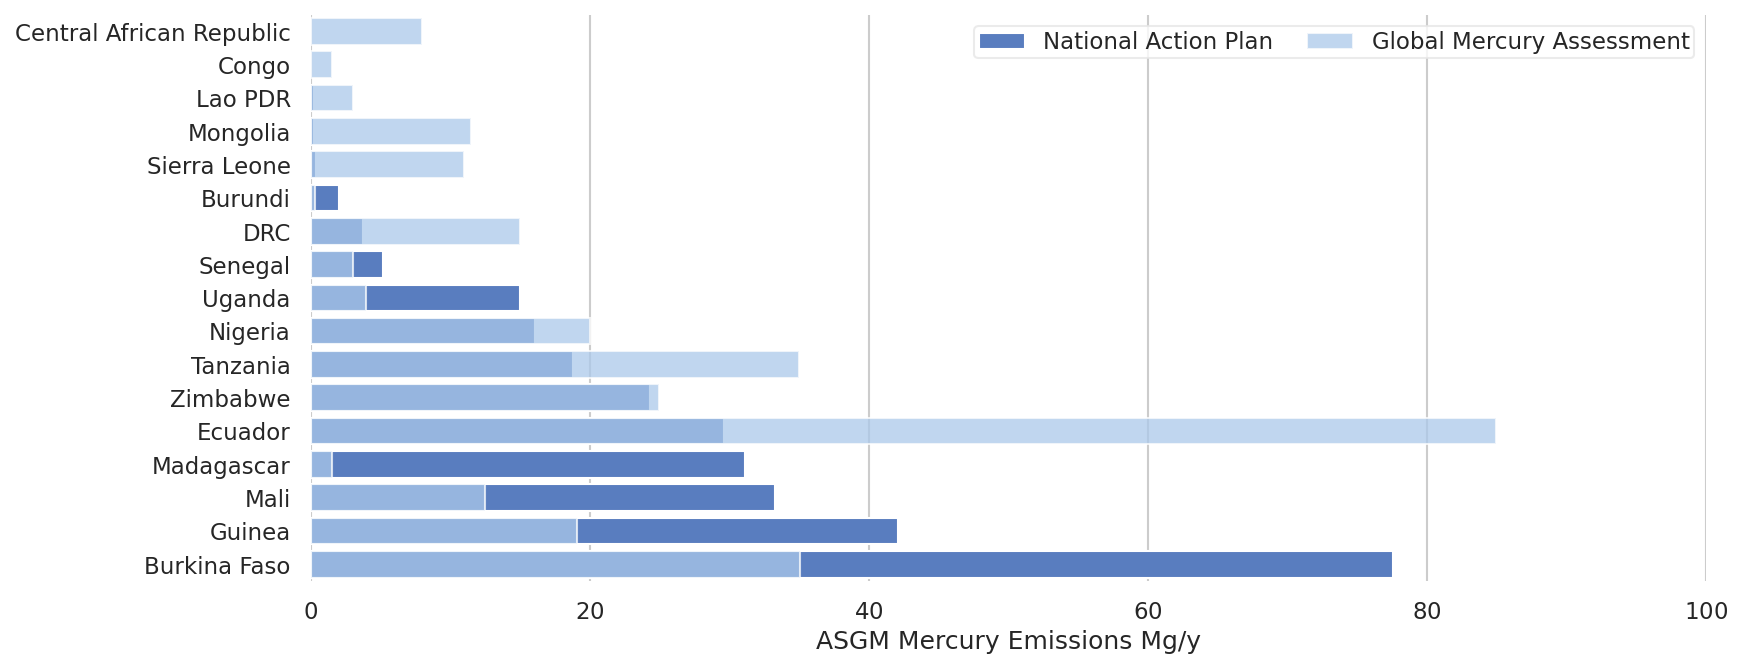

In [ ]:

import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
fig, ax = plt.subplots(figsize=(12, 5))

# Load the example car crash dataset
crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)

# Plot the total crashes
sns.set_color_codes("muted")

sns.barplot(x="NAP_Mercury_use t/y", y="Country", data=NAPHG,
            label="National Action Plan", color="b")

#Plot the crashes where alcohol was involved
sns.set_color_codes("pastel")
sns.barplot(x="GMA_Mercury_use t/y", y="Country", data=NAPHG,
            label="Global Mercury Assessment", color="b",alpha=0.75)

# Add a legend and informative axis label
ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(xlim=(0, 100), ylabel="",
       xlabel="ASGM Mercury Emissions Mg/y")
sns.despine(left=True, bottom=True)
name='07-24-22_global-hg-emission-estimates_vs_nap_estimates.pdf'
savepath='/home/tzd/fs03/d1/tzd/Data_analysis/MIT_TPP_thesis/figures/'+name
fig.savefig(savepath,bbox_inches='tight')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=062c0bf9-42c4-47d5-bc83-fb7cbde5be86' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>